This script helps in visualizing transformed annotations over the image to test whether they were generated correctly or not. 

In [1]:
from PIL import Image, ImageDraw,ImageFont
import matplotlib.pyplot as plt
import numpy as np
from boundingbox_utils import *

In [21]:
def plot_bounding_box(image, annotation_list):
    boats = 0
    obstacles = 0
    categories_to_colors, ordered_categories = MapColorPalette(xml_file)
    class_id_to_name_mapping=  GetCategoriesDict(categories_to_colors)
        
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)
    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h
    transformed_annotations[:,2] += 0 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        font = ImageFont.truetype("arial.ttf", 30)
        plotted_image.rectangle((x0, y0, x0 + 120, y0 + 40), fill=(255,255,255,255))
        plotted_image.text((x0, y0), class_id_to_name_mapping[(int(obj_cls))], font=font,  fill=(255,0,0,255) )
        plotted_image.rectangle(((x0,y0), (x1,y1)), outline = 'yellow', width = 3)
        if obj_cls == 0:
            boats +=1
        if obj_cls == 1:
            obstacles +=1
    print('The images has {0} boats and {1} obstacles'.format(boats, obstacles))
    fig = plt.figure(figsize=(w/50, h/50))
    plt.imshow(np.array(image))
    plt.axis('off')
    plt.show()
    fig.savefig('out.png', bbox_inches='tight', pad_inches=0)


['0 0.316666666666667 0.476388888888889 0.1604166667 0.162037037', '0 0.04453125 0.277314814814815 0.0890625 0.5546296296', '0 0.458854166666667 0.464814814814815 0.1010416667 0.1314814815']
The images has 3 boats and 0 obstacles


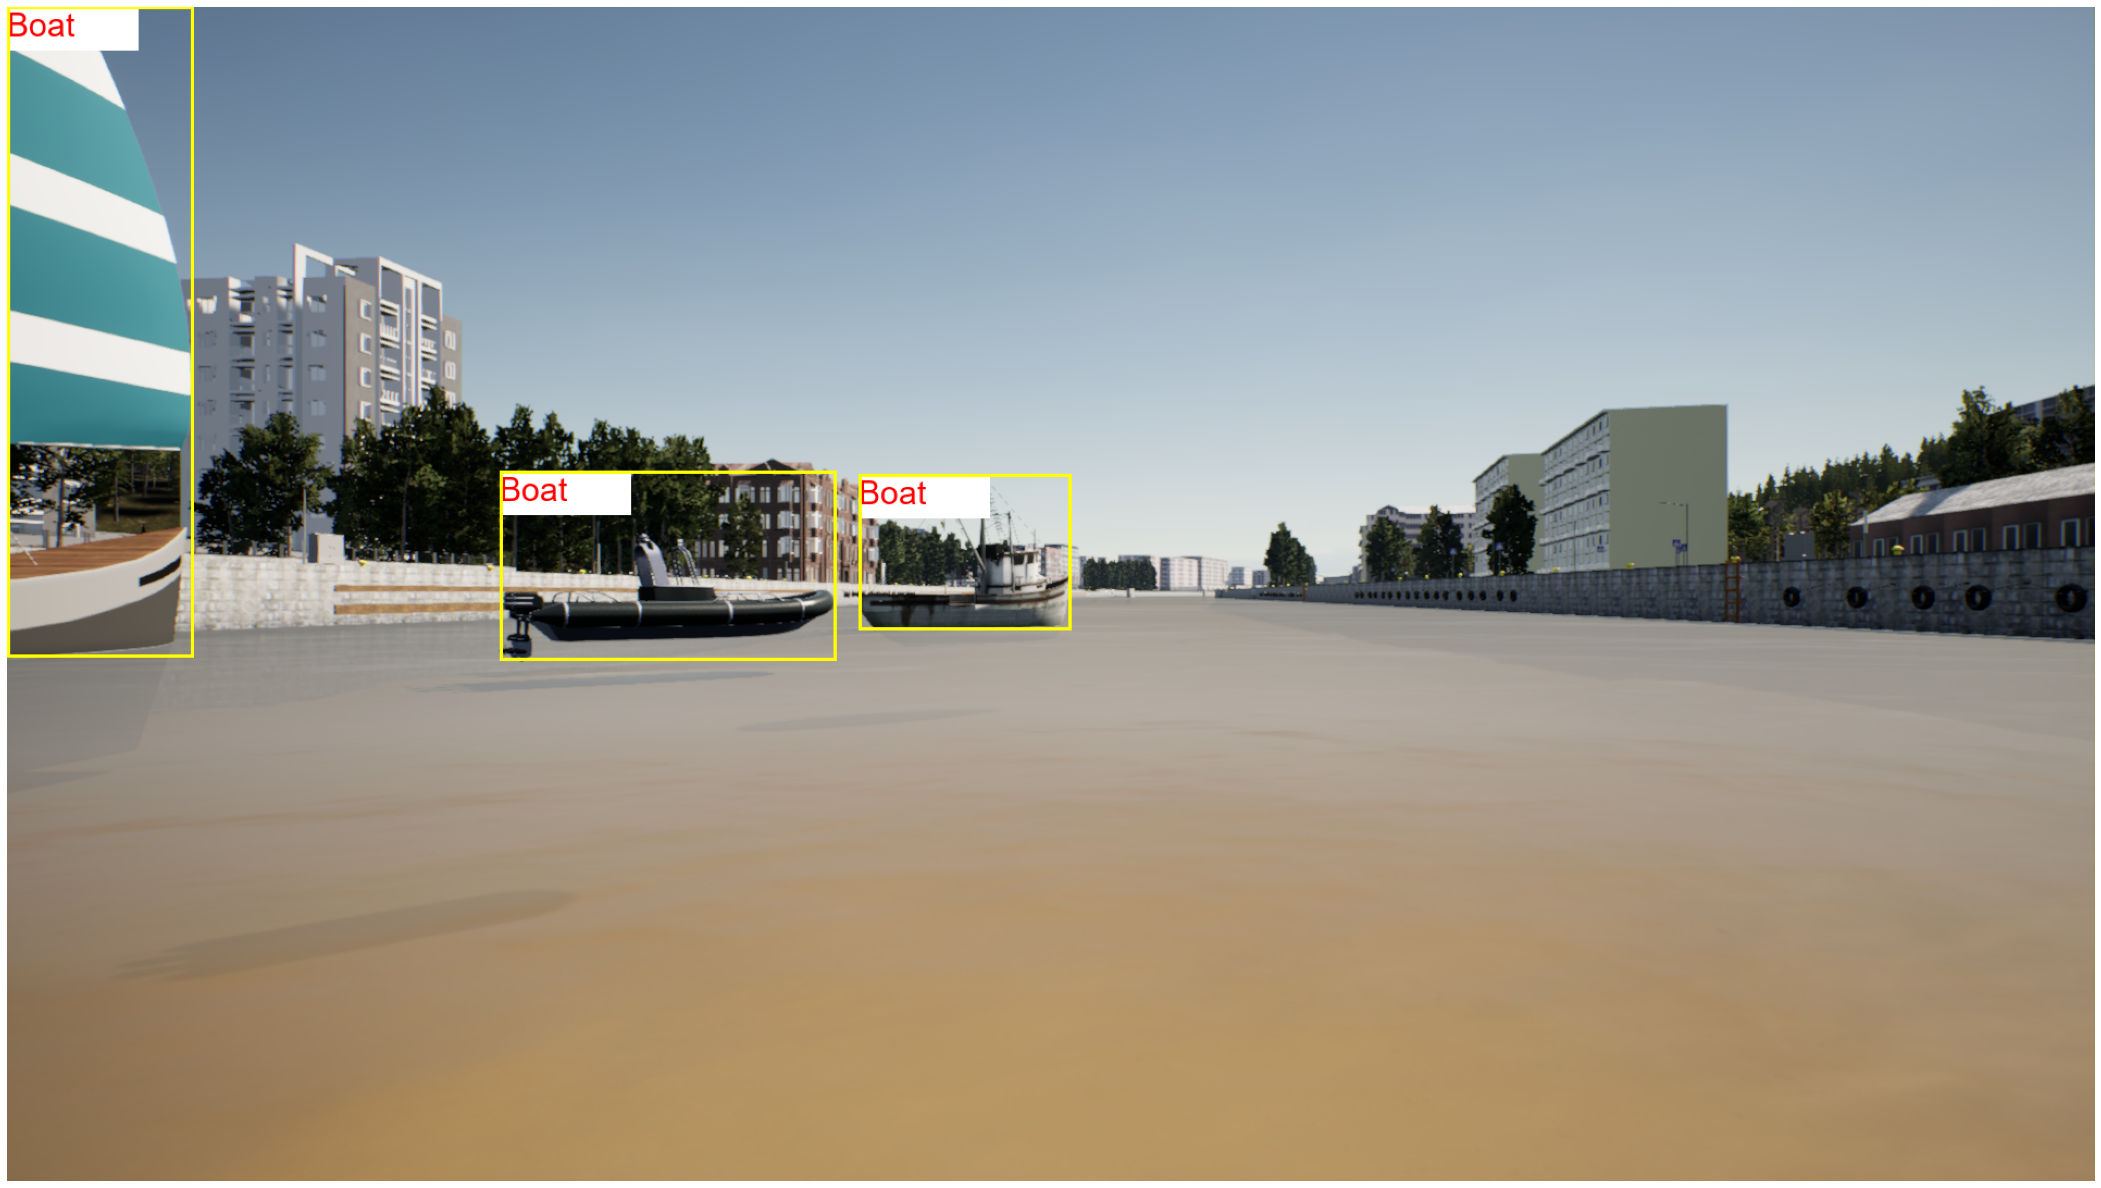

In [22]:
#image
image_file = "sample_images/2.png"
#annotation
annotation_file = "annotated_images/annotations/2_mask.txt" 
# This is an AILiveSim file where we can define our categories
xml_file = "GroundTruthColorMapping.xml"
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")
    print(annotation_list)
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)